<a href="https://colab.research.google.com/github/201710524/MACHINE-LEARNING/blob/master/py36_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
![alt text](./figs/mycnn.jpg)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[alt text](./figs/mycnn.jpg)'


# MNIST train, test dataset 가져오기


In [71]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),
                       target_transform=None, download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),
                       target_transform=None, download=True)

# 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label: 5


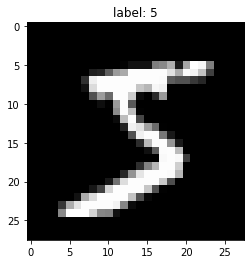

In [72]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))


image, label = mnist_train.__getitem__(0)
print("image data 형태:", image.size())
print("label:", label)

img= image.numpy()
plt.title("label: %d"%label)
plt.imshow(img[0], cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


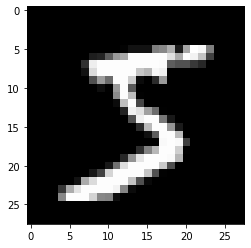

0


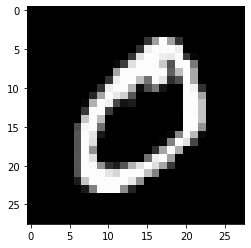

4


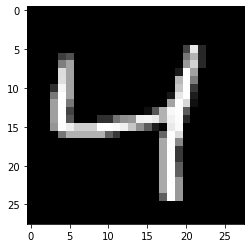

In [74]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img = mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0],cmap='gray')
  plt.show()


# convolution 하나 씌워보기


torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


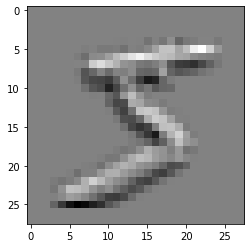

In [75]:
# mnist 의 첫 번째 이미지, 라벨 가져오기
imgae, label = mnist_train[0]

#view, tensor 의 사이즈 조절 -1: 해당 차원 차원 확장시켜라
#[1,28,28] ->[1,1, 28, 28]
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

# convolutional filter 정의
conv_layer=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3,padding=1)
# image 에 filter 적용
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
   
    plt.show

# CNN 만들기

## train, test data 가져오기


In [76]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10 #1000

In [77]:
train_loader=torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                         shuffle=True, num_workers=2,
                                         drop_last=True)
test_loader=torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         drop_last=True)


# CNN 클래스 만들기 (모델 만들기)

In [82]:
class CNN(nn.Module):   #nn.Moudle 상속받음
    def __int__(self):
      super(CNN, self).__init__()
      self.layer=nn.Sequential(
          nn.Conv2d(1, 16, 5, padding=2),
          nn.ReLU(),

          nn.Conv2d(16, 32, 5, padding=2),
          nn.ReLU(),
          nn.MaxPool2d(2,2),

          nn.Conv2d(32, 64, 5, padding=2),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      self.fc_layer=nn.Sequential(
          nn.Linear(64*7*7, 100),
          nn.ReLU(),
          nn.Linear(100,10)
      )
    def forward(self, x):
      out = self.layer(x)
      out = out.view(batch_size, -1)
      out = self.fc_layer(out)
      return out
model= CNN().cuda

In [83]:
# 파라미터 체크하기
for parameter in model.parameters():
    print(parameter)
    print(parameter.shape)

AttributeError: ignored

In [80]:
loss_func=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


AttributeError: ignored

In [ ]:

for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = Variable(image).cuda()
    y_= Variable(label).cuda()

    optimizer.zero_grad()
    output=model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()
    if j%50==0:
      print(loss, j, i)

NameError: ignored